<a href="https://colab.research.google.com/github/Taejin1221/MachineLearning/blob/master/ResNet/FashionMNIST/ResNet_46layers_500Epochs_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
os.chdir('drive/My Drive/Colab Notebooks')

In [ ]:
import tensorflow as tf
 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import datasets

In [ ]:
n = 7

In [ ]:
inputs = keras.Input( shape = ( 28, 28, 1 ), name = 'input' )

identity = layers.Conv2D( filters = 16, kernel_size = [ 7, 7 ], padding = 'Same', activation = 'relu' )(inputs)

# block 1
for _ in range( n ):
    output = layers.Conv2D( filters = 16, kernel_size = [ 3, 3 ], padding = 'Same' )(identity)
    output = layers.BatchNormalization()(output)
    output = layers.Activation('relu')(output)
    
    output = layers.Conv2D( filters = 16, kernel_size = [ 3, 3 ],
                           padding = 'Same' )(output)
    output = layers.BatchNormalization()(output)
    
    output = layers.Add()( [ output, identity ] )
    identity = layers.Activation('relu')(output)

identity = layers.MaxPooling2D( pool_size = [ 3, 3 ], padding = 'same',
                               strides = 2 )(identity)

In [ ]:
# block 2
identity = layers.ZeroPadding2D( [ 0, 8 ], 'channels_first' )(identity)
for _ in range( n ):
    output = layers.Conv2D( filters = 32, kernel_size = [ 3, 3 ],
                           padding = 'Same' )(identity)
    output = layers.BatchNormalization()(output)
    output = layers.Activation('relu')(output)
    
    output = layers.Conv2D( filters = 32, kernel_size = [ 3, 3 ],
                           padding = 'Same' )(output)
    output = layers.BatchNormalization()(output)
    
    output = layers.Add()( [ output, identity ] )
    identity = layers.Activation('relu')(output)

identity = layers.MaxPooling2D( pool_size = [ 3, 3 ], padding = 'same',
                               strides = 2 )(identity)

In [ ]:
# block 3
identity = layers.ZeroPadding2D( [ 0, 16 ], 'channels_first' )(identity)
for _ in range( n ):
    output = layers.Conv2D( filters = 64, kernel_size = [ 3, 3 ],
                           padding = 'Same' )(identity)
    output = layers.BatchNormalization()(output)
    output = layers.Activation('relu')(output)
    
    output = layers.Conv2D( filters = 64, kernel_size = [ 3, 3 ],
                           padding = 'Same' )(output)
    output = layers.BatchNormalization()(output)
    
    output = layers.Add()( [ output, identity ] )
    identity = layers.Activation('relu')(output)

identity = layers.MaxPooling2D( pool_size = [ 3, 3 ], padding = 'same',
                               strides = 2 )(identity)

In [ ]:
output = layers.GlobalAveragePooling2D()(identity)
output = layers.Dense( 128, activation = 'relu' )(output)
output = layers.Dense( 128, activation = 'relu' )(output)
output = layers.Dense( 10, activation = 'softmax' )(output)

In [ ]:
model = keras.Model( inputs = inputs, outputs = output, name = 'resnet' )
model.summary()

Model: "resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 16)   800         input[0][0]                      
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 16)   2320        conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 28, 28, 16)   64          conv2d_1[0][0]                   
_____________________________________________________________________________________________

In [ ]:
lr = 1e-3
BATCH_SIZE = 512
EPOCHS = 500
model_name = 'ResNet_46Layers(500Epochs, Modified1, FashionMNIST)'

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = keras.utils.to_categorical( y_train, 10 )
y_test = keras.utils.to_categorical( y_test, 10 )

model.compile( optimizer = keras.optimizers.RMSprop( lr, 0.9 ),
             loss = keras.losses.CategoricalCrossentropy( from_logits = True ),
              metrics = ['acc'])

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
history = model.fit( x_train, y_train, batch_size = BATCH_SIZE,
                    epochs = EPOCHS, validation_split = 0.2 )

Epoch 1/500
94/94 [==============================] - 36s 380ms/step - loss: 2.2426 - acc: 0.2164 - val_loss: 2.3571 - val_acc: 0.1028
Epoch 2/500
94/94 [==============================] - 34s 363ms/step - loss: 2.1811 - acc: 0.2780 - val_loss: 2.2176 - val_acc: 0.2372
Epoch 3/500
94/94 [==============================] - 34s 362ms/step - loss: 2.0111 - acc: 0.4472 - val_loss: 2.2801 - val_acc: 0.1802
Epoch 4/500
94/94 [==============================] - 34s 362ms/step - loss: 1.8868 - acc: 0.5715 - val_loss: 1.8599 - val_acc: 0.5999
Epoch 5/500
94/94 [==============================] - 34s 362ms/step - loss: 1.7914 - acc: 0.6689 - val_loss: 1.7943 - val_acc: 0.6688
Epoch 6/500
94/94 [==============================] - 34s 362ms/step - loss: 1.6987 - acc: 0.7625 - val_loss: 1.7107 - val_acc: 0.7552
Epoch 7/500
94/94 [==============================] - 34s 361ms/step - loss: 1.6187 - acc: 0.8424 - val_loss: 1.7804 - val_acc: 0.6785
Epoch 8/500
94/94 [==============================] - 34s 362ms

In [ ]:
evaluation = model.evaluate( x_test, y_test )
print( f'loss: {evaluation[0]:.2f}, acc: {evaluation[1]*100:.2f}%' )

313/313 [==============================] - 4s 14ms/step - loss: 1.5456 - acc: 0.9155
loss: 1.55, acc: 91.55%


In [ ]:
model.save( model_name + '.h5')

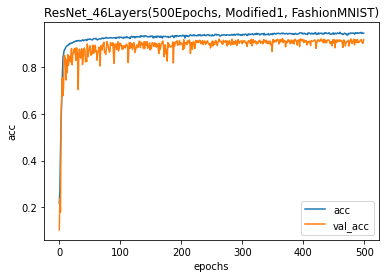

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot( history.history['acc'] )
plt.plot( history.history['val_acc'])
plt.xlabel( 'epochs' )
plt.ylabel( 'acc' )
plt.legend( ['acc', 'val_acc'] )
plt.title( model_name )

plt.savefig( model_name + '.png')
plt.show()